In [1]:
import requests
import cv2
from matplotlib import pyplot as plt 
import numpy as np

from utils import *

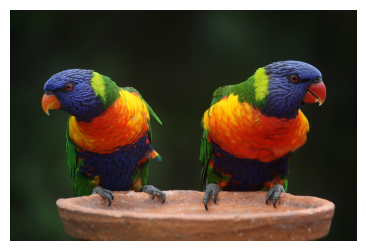

In [4]:
image = cv2.imread('data/images/parrots.jpg')       # if your image is saved locally
                                                    # if you're getting an image from the Internet --> image = getImage(link to image)

image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)      # opencv reads image in BGR format but matplot lib expects it in RGB format

plt.figure(figsize=(5,3))
plt.imshow(image)                                   # needs to be RGB format to show properly
plt.axis('off')
plt.show()

### RGB

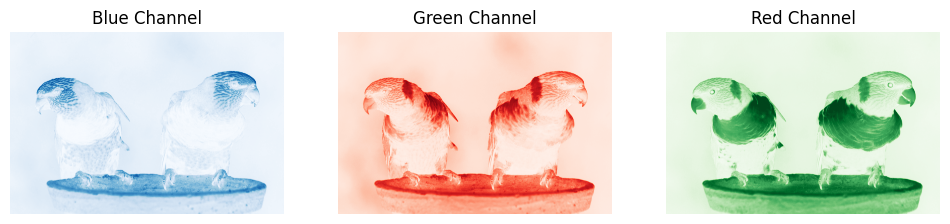

In [11]:
import cv2
from matplotlib import pyplot as plt

# Read the image using cv2
image_path = 'data/images/parrots.jpg'  # Replace with the actual path to your image
image = cv2.imread(image_path)

# Split the image into its three color channels (BGR format)
blue_channel, green_channel, red_channel = cv2.split(image)

# Display each channel separately using Matplotlib in Jupyter Lab
plt.figure(figsize=(12, 6))             # setting up a figure or 'window' for the subplots to be displayed on

# Display the Blue channel
plt.subplot(131)                         # 1 3 1 --> row column subplot_index
                                         # subplot has 1 row, 3 columns, and we're choosing the first subplot index (blue channel)
plt.imshow(blue_channel, cmap='Blues')   
plt.title('Blue Channel')
plt.axis('off')

# Display the Green channel
plt.subplot(132)
plt.imshow(green_channel, cmap='Reds')   # you can also put 'gray' instead of 'Blues'/'Reds'/'Greens'
plt.title('Green Channel')
plt.axis('off')

# Display the Red channel
plt.subplot(133)
plt.imshow(red_channel, cmap='Greens')
plt.title('Red Channel')
plt.axis('off')

plt.show()


### HSV

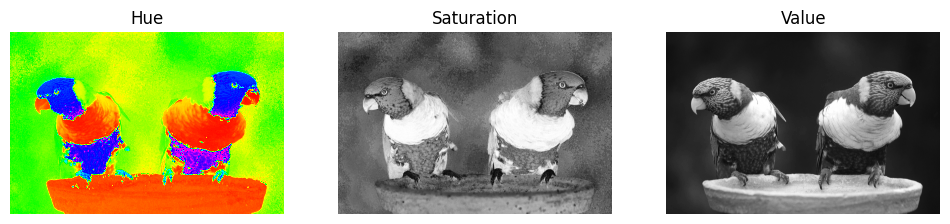

In [16]:
import cv2
from matplotlib import pyplot as plt

# Read the image using cv2
image_path = 'data/images/parrots.jpg'  # Replace with the actual path to your image
image = cv2.imread(image_path)

image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

# Split the image into its three color channels (HSV format)
hue_channel, saturation_channel, value_channel = cv2.split(image)

# Display each channel separately using Matplotlib in Jupyter Lab
plt.figure(figsize=(12, 6))

# Display the Hue (type of color) channel
plt.subplot(131)
plt.imshow(hue_channel, cmap='hsv')
plt.title('Hue')
plt.axis('off')

# Display the Saturation (vividness or purity of the color) channel                         0 = grayscale ('no color'), 1 = maximum intensity of the color
plt.subplot(132)
plt.imshow(saturation_channel, cmap='gray')
plt.title('Saturation')
plt.axis('off')

# Display the Value (brightness) channel                                                    high val = brighter color (closer to white), low val = darker color (closer to black)
plt.subplot(133)
plt.imshow(value_channel, cmap='gray')
plt.title('Value')
plt.axis('off')

plt.show()

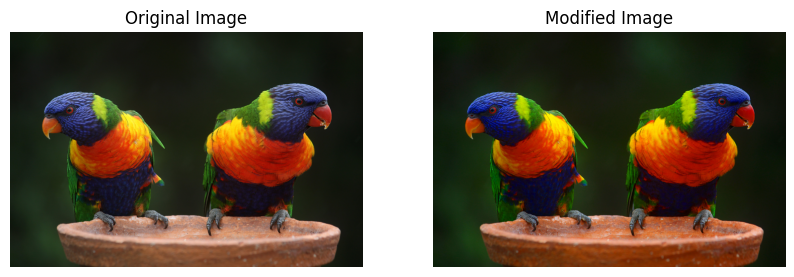

In [4]:
import cv2
from matplotlib import pyplot as plt 
import numpy as np

# Read the image using cv2
image = cv2.imread('data/images/parrots.jpg')

# Convert the image to HSV color space
image_hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

# Split the HSV image into its three channels
hue_channel, saturation_channel, value_channel = cv2.split(image_hsv)

# -----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
#  Modify the channel [hue range is [0,179] in opencv]
modified_channel = np.clip(1.5 * saturation_channel, 0, 255).astype(np.uint8)                                           # multiplies each pixel val in the saturation channel by 1.5
                                                                                                                        # anything beyond 255 will be 'clipped' to 255
                                                                                                                        # all manipulations should be done in float (more accurate)
                                                                                                                        # after, you can convert back to uint8

#modified_channel = np.clip(1.5 * value_channel, 0, 255).astype(np.uint8)                                               # same as above but modifies the value channel

#modified_channel = np.repeat(np.linspace(0,179,image.shape[0]).reshape(-1,1), image.shape[1], 1).astype(np.uint8)      # creates an arr of evenly-spaced values from 0 to 179, 
                                                                                                                        # with the number of values = # of rows in the image
                                                                                                                        # then reshapes the 1D array into a 2D column vector
                                                                                                                        # finally, repeats the column vector horizontally to create a 
                                                                                                                        # 2D array with the same number of columns as the image

#modified_channel = 80*np.ones(image.shape[0:2]).astype(np.uint8)                                                       # creates a 2D array of 1s with the same number of rows and 
                                                                                                                        # columns as the image & then multiplies all elements by 80

# -----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

# -----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
# Merge the modified channels back into an HSV image
modified_hsv_image = cv2.merge([hue_channel, modified_channel, value_channel])                                          # order is important
#modified_hsv_image = cv2.merge([hue_channel, saturation_channel, modified_channel])
#modified_hsv_image = cv2.merge([modified_channel, saturation_channel, value_channel])

# -----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

# Convert the modified HSV image back to BGR color space
modified_image = cv2.cvtColor(modified_hsv_image, cv2.COLOR_HSV2BGR)

# Display the original and modified images side by side
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(modified_image, cv2.COLOR_BGR2RGB))
plt.title('Modified Image')
plt.axis('off')

plt.show()

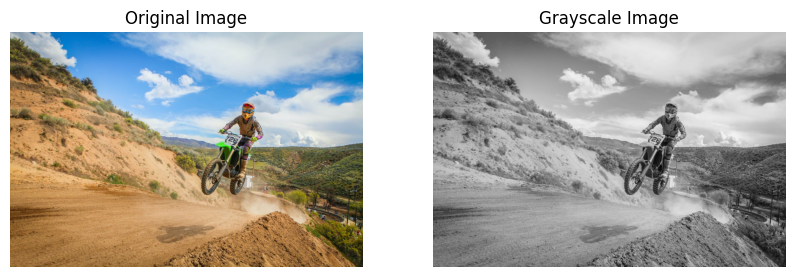

In [81]:
# Read the image using cv2
image = cv2.imread('data/images/motorbike.jpeg')

# Convert the image to HSV color space
image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Display the original and modified images side by side
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)    # or (121)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(image_gray, cmap = 'gray')
plt.title('Grayscale Image')
plt.axis('off')

plt.show()

### Histograms

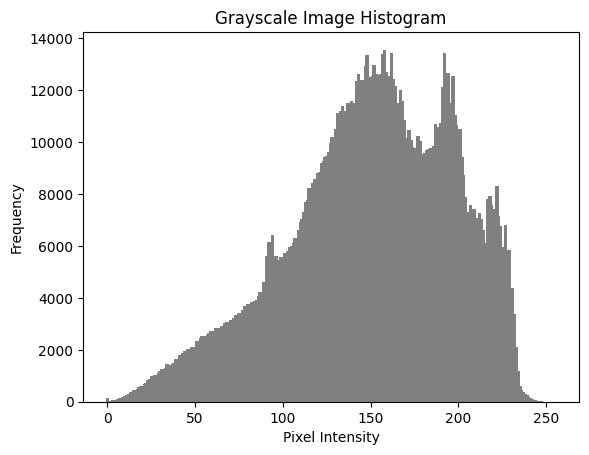

In [30]:
# Read the image
image = cv2.imread('data/images/motorbike.jpeg', cv2.IMREAD_GRAYSCALE)

# Calculate the histogram
histSize = 256                                                      # binSize (if I reduce it to 50, each bin will carry/have more pixels)
hist = cv2.calcHist([image], [0], None, [histSize], [0, 256])       # calcHist(list of images, channels, mask, histSize, range)
                                                                        # channel 0 = first and only channel (since it's in grayscale), the channel is the intensity 
                                                                        # None --> don't use any mask when computing the histogram
                                                                        # [0, 256] --> range of pixel values to be considered for the histogram (full range of pixels from 0 to 255)
# there's also a function in the numPy library to create histograms

# Plot the histogram
plt.bar(range(histSize), hist.flatten(), width=2.0, color='gray')   # hist.flatten() --> give me one big array (of size 256)
plt.title('Grayscale Image Histogram')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')
plt.show()


In [31]:
hist.flatten().shape

(256,)

### White-Balancing

In [33]:
image = getImage('https://images.pexels.com/photos/12354912/pexels-photo-12354912.jpeg?auto=compress&cs=tinysrgb&w=1260&h=750&dpr=2')   
image_float = image.astype(np.float32)

# Calculate the average intensities for each channel
avg_b = np.mean(image_float[:, :, 0])
avg_g = np.mean(image_float[:, :, 1])
avg_r = np.mean(image_float[:, :, 2])

print("Average Intensities (B, G, R): ", avg_b, avg_g, avg_r)

# Find the overall average intensity
avg_gray = (avg_b + avg_g + avg_r) / 3

# Calculate scaling factors for each channel
scale_b = avg_gray / avg_b
scale_g = avg_gray / avg_g
scale_r = avg_gray / avg_r

print("Scaling Factors (B, G, R): ", scale_b,scale_g,scale_r)

Average Intensities (B, G, R):  62.962646 104.44743 125.89134
Scaling Factors (B, G, R):  1.5527800396802316 0.9360415805036434 0.7765993993433461


##### The code snippet above ^^ is already included in the next part 

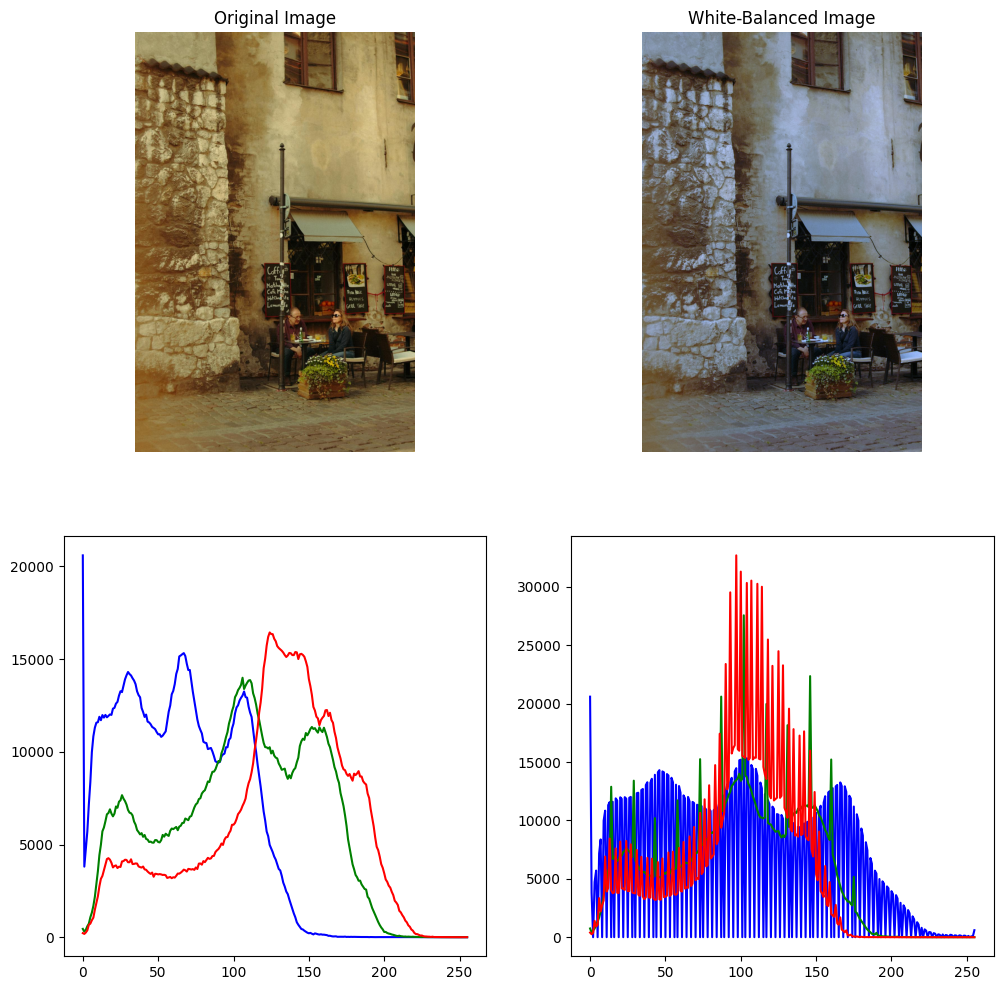

In [36]:
# Read the image (from the Internet or locally)
image = getImage('https://images.pexels.com/photos/12354912/pexels-photo-12354912.jpeg?auto=compress&cs=tinysrgb&w=1260&h=750&dpr=2')   # this image is 1500 rows, 1000 columns, 
                                                                                                                                        # and a has a depth of (no.channels) 3
#image = cv2.imread('data/images/chair.jpg')

# Convert BGR to float32 for more accurate calculations
image_float = image.astype(np.float32)

# Calculate the average intensities for each channel
avg_b = np.mean(image_float[:, :, 0])                       # everything from the first dimension, everything from the second dimension (all rows & cols) and the first channel (B)
avg_g = np.mean(image_float[:, :, 1])
avg_r = np.mean(image_float[:, :, 2])

# Find the overall average intensity
avg_gray = (avg_b + avg_g + avg_r) / 3                      # we assume the average color/intensities is grey (we want the three averages around 127??)

# Calculate scaling factors for each channel                # (shift the gray to the average value)
                                                            # used to adjust the intensity values in each channel to achieve a more balanced/normalized color representation
                                                            # This type of normalization is often done to equalize the contributions of different color channels in an image
scale_b = avg_gray / avg_b
scale_g = avg_gray / avg_g
scale_r = avg_gray / avg_r

# Apply the scaling factors to each channel                         # merge the three channels into a single image 
balanced_image_float = cv2.merge([image_float[:, :, 0] * scale_b,   # scale the intensity values in each channel using the scaling factors calculated previously
                            image_float[:, :, 1] * scale_g,
                            image_float[:, :, 2] * scale_r])
balanced_image_float = np.clip(balanced_image_float, 0, 255)

# Convert the result back to uint8 format
balanced_image = balanced_image_float.astype(np.uint8)

# Display the original and balanced images
plt.figure(figsize=(12, 12))

plt.subplot(2, 2, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off')

plt.subplot(2, 2, 2)
plt.imshow(cv2.cvtColor(balanced_image, cv2.COLOR_BGR2RGB))
plt.title('White-Balanced Image')
plt.axis('off')

# Calculate the histogram of original image
histSize = 256
color = ('b','g','r')
plt.subplot(2, 2, 3)
for i,col in enumerate(color):
    histr = cv2.calcHist([image],[i],None,[histSize],[0,256])
    plt.plot(histr, color = col)
    #plt.bar(range(histSize), histr.flatten(), width=1.0, color=col)
    #plt.xlim([0,histSize])

# Calculate the histogram of the white-balanced image
histSize = 256
color = ('b','g','r')
plt.subplot(2, 2, 4)
for i,col in enumerate(color):
    #histr = np.histogram(balanced_image_float[:,:,i], np.arange(0,256,1))[0]
    histr = cv2.calcHist([balanced_image],[i],None,[histSize],[0,256])
    plt.plot(histr, color = col)
    #plt.bar(range(histSize), histr.flatten(), width=1.0, color=col)
    #plt.xlim([0,histSize])

### Resize

(-0.5, 70.5, 46.5, -0.5)

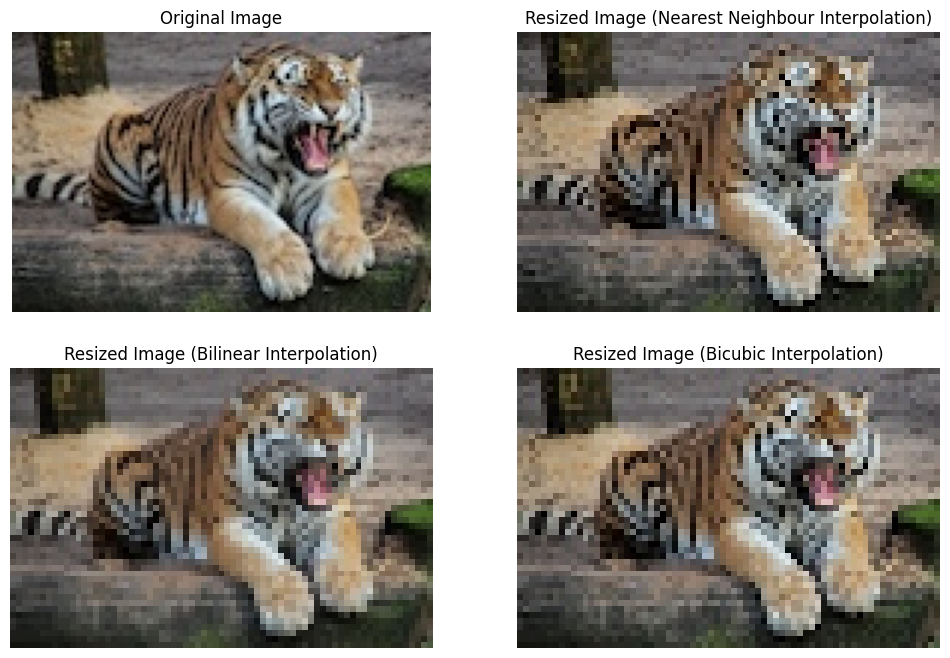

In [37]:
import cv2

# Read the original image
image = cv2.imread('data/images/tiger.jpg')

# Resize the image (using three different interpolation methods)
    # cv2.resize(image, (width of output image, height of output image), interpolation method) 
resized_image_1 = cv2.resize(image, (int(image.shape[1]/2), int(image.shape[0]/2)), interpolation=cv2.INTER_NEAREST)
resized_image_2 = cv2.resize(image, (int(image.shape[1]/2), int(image.shape[0]/2)), interpolation=cv2.INTER_LINEAR)
resized_image_3 = cv2.resize(image, (int(image.shape[1]/2), int(image.shape[0]/2)), interpolation=cv2.INTER_CUBIC)

    # Nearest Neighbour is the fastest but may result in a blocky appearance
    # Bilinear provides a smoother result 
    # Bicubic is even smoother but requires more computation.

# Display the original and resized images (optional)
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off')

plt.subplot(2, 2, 2)
plt.imshow(cv2.cvtColor(resized_image_1, cv2.COLOR_BGR2RGB))
plt.title('Resized Image (Nearest Neighbour Interpolation)')
plt.axis('off')

plt.subplot(2, 2, 3)
plt.imshow(cv2.cvtColor(resized_image_2, cv2.COLOR_BGR2RGB))
plt.title('Resized Image (Bilinear Interpolation)')
plt.axis('off')

plt.subplot(2, 2, 4)
plt.imshow(cv2.cvtColor(resized_image_3, cv2.COLOR_BGR2RGB))
plt.title('Resized Image (Bicubic Interpolation)')
plt.axis('off')